In [1]:
import torch
from torch import autocast
from contextlib import contextmanager, nullcontext

from diffusers import StableDiffusionPipeline

from huggingface_hub import notebook_login

In [2]:
# Get the token here: https://huggingface.co/settings/tokens

# can comment this out once you have logged in
notebook_login()

In [3]:
def get_device():
    if(torch.cuda.is_available()):
        return 'cuda'
    elif(torch.backends.mps.is_available()):
        return 'mps'
    else:
        return 'cpu'
    
device = torch.device(get_device())

In [4]:
# change use_auth_token to False once you have downloaded the model

pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4", use_auth_token=True)

In [5]:

pipe = pipe.to(device)

# This lets us use half-precision when using CUDA
precision_scope = autocast if device.type == 'cuda' else nullcontext


/Users/nlothian/dev/random_projects/m1_huggingface_diffusers_demo/venv/lib/python3.10/site-packages/transformers/models/clip/modeling_clip.py:663: UserWarning: The operator 'aten::index.Tensor' is not currently supported on the MPS backend and will fall back to run on the CPU. This may have performance implications. (Triggered internally at  /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/mps/MPSFallback.mm:11.)
  pooled_output = last_hidden_state[torch.arange(last_hidden_state.shape[0]), input_ids.argmax(dim=-1)]


  0%|          | 0/51 [00:00<?, ?it/s]

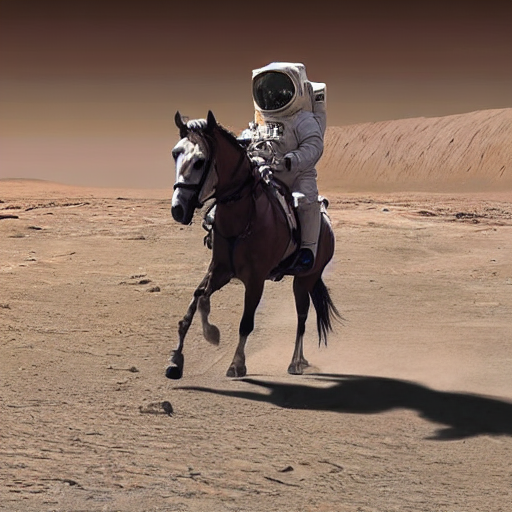

In [6]:

# Note that setting the seed to the same value correctly reproduces the same image
generator = torch.Generator(device="cpu").manual_seed(92)

prompt = "a photo of an astronaut riding a horse on mars"

# On a 2022 MBP M1 Max with 32Gb RAM I get 1.53 it/s
with precision_scope(device.type):
    images = pipe(prompt=prompt, generator=generator, num_inference_steps=50)["sample"]
    
images[0]